<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title :  Covid 19 Project

#### Name: Justin Chong

#### IC Number: 960327-07-5097

#### Date : 28/6/2023

#### Introduction : Doing an exercise on the data collected from the COVID-19 pandemic.



#### Conclusion : This exercise has helped me with analysing data and plotting graphs with the data.






# Covid 19 Python Project (use all your knowledge thus far to solve this)

From Wikipedia,

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. Common symptoms include fever, cough and shortness of breath. Muscle pain, sputum production and sore throat are less common. The rate of deaths per number of diagnosed cases is on average 3.4%, ranging from 0.2% in those less than 20 to approximately 15% in those over 80 years old.

Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

File naming convention

MM-DD-YYYY.csv in UTC.

Field description

Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
Country/Region: country/region name conforming to WHO (will be updated).
Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
Deaths: the number of deaths.
Recovered: the number of recovered cases.
Update frequency
Files after Feb 1 (UTC): once a day around 23:59 (UTC).
Files on and before Feb 1 (UTC): the last updated files before 23:59 (UTC).

Q1. Write Python code to display first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

covid_data = pd.read_csv('10-10-2020.csv')
covid_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-11 04:23:46,33.93911,67.709953,39789,1477,33064,5248,Afghanistan,102.210880,3.712081
1,NaN,NaN,NaN,Albania,2020-10-11 04:23:46,41.15330,20.168300,15231,416,9406,5409,Albania,529.258461,2.731272
2,NaN,NaN,NaN,Algeria,2020-10-11 04:23:46,28.03390,1.659600,52940,1795,37170,13975,Algeria,120.726889,3.390631
3,NaN,NaN,NaN,Andorra,2020-10-11 04:23:46,42.50630,1.521800,2696,55,1814,827,Andorra,3489.290105,2.040059
4,NaN,NaN,NaN,Angola,2020-10-11 04:23:46,-11.20270,17.873900,6246,218,2716,3312,Angola,19.004287,3.490234


In [2]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3262 non-null   float64
 1   Admin2               3267 non-null   object 
 2   Province_State       3816 non-null   object 
 3   Country_Region       3992 non-null   object 
 4   Last_Update          3992 non-null   object 
 5   Lat                  3907 non-null   float64
 6   Long_                3907 non-null   float64
 7   Confirmed            3992 non-null   int64  
 8   Deaths               3992 non-null   int64  
 9   Recovered            3992 non-null   int64  
 10  Active               3992 non-null   int64  
 11  Combined_Key         3992 non-null   object 
 12  Incidence_Rate       3907 non-null   float64
 13  Case-Fatality_Ratio  3937 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 436.8+ KB


In [3]:
covid_data.isnull().sum()

FIPS                   730
Admin2                 725
Province_State         176
Country_Region           0
Last_Update              0
Lat                     85
Long_                   85
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          85
Case-Fatality_Ratio     55
dtype: int64

Q2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise

In [4]:
covid_data.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,39789,1477,33064,5248
Albania,15231,416,9406,5409
Algeria,52940,1795,37170,13975
Andorra,2696,55,1814,827
Angola,6246,218,2716,3312
...,...,...,...,...
West Bank and Gaza,43945,378,37240,6327
Winter Olympics 2022,0,0,0,0
Yemen,2051,595,1329,127


Q3. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19)

In [5]:
china_provinces = covid_data[covid_data['Country_Region'] == 'China']
china_provinces[['Province_State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)

,Province_State,Confirmed,Deaths,Recovered
0,Anhui,991,6,985
1,Beijing,936,9,927
2,Chongqing,585,6,578
3,Fujian,415,1,400
4,Gansu,170,2,168
5,Guangdong,1858,8,1823
6,Guangxi,260,2,256
7,Guizhou,147,2,145
8,Hainan,171,6,165
9,Hebei,365,6,358


Q4. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [6]:
covid_data.groupby(['Country_Region'])[['Deaths']].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,1477
1,Albania,416
2,Algeria,1795
3,Andorra,55
4,Angola,218
...,...,...
192,West Bank and Gaza,378
193,Winter Olympics 2022,0
194,Yemen,595
195,Zambia,337


Q5. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered

In [7]:
# no_cases = covid_data[covid_data['Recovered'] == 0]
# no_cases.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

no_cases = covid_data[covid_data['Recovered'] == 0]
no_cases = no_cases.groupby(['Country_Region'])[['Recovered']].sum()
no_cases[no_cases == 0].reset_index()

# Before filtering out countries with zero cases of recoveries
# no_recovered = covid_data.groupby('Country_Region')['Recovered'].sum()
# no_recovered[no_recovered == 0].reset_index()

,Country_Region,Recovered
0,Antarctica,0
1,Australia,0
2,Canada,0
3,China,0
4,Colombia,0
5,Germany,0
6,India,0
7,Kiribati,0
8,"Korea, North",0
9,MS Zaandam,0


Q6. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.


In [8]:
covid_data.groupby(['Country_Region', 'Province_State'])[['Deaths', 'Recovered']].sum()

Deaths  Recovered
Country_Region Province_State                                                 
Australia      Australian Capital Territory                       3        110
               New South Wales                                   53          0
               Northern Territory                                 0         33
               Queensland                                         6       1152
               South Australia                                    4        466
...                                                             ...        ...
United Kingdom Saint Helena, Ascension and Tristan da Cunha       0          2
               Scotland                                        4339          0
               Turks and Caicos Islands                           6        672
               Unknown                                           74          0
               Wales                                           2700          0

[601 rows x 2 columns]

Q7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died

In [9]:
all_deaths = covid_data[(covid_data['Confirmed'] > 0) & (covid_data['Recovered'] == 0) & (covid_data['Active'] == 0) & (covid_data['Confirmed'] == covid_data['Deaths'])]
all_deaths = all_deaths.groupby(['Country_Region'])[['Confirmed', 'Deaths']].sum()
# all_deaths.index.tolist()
print(all_deaths)

Empty DataFrame
Columns: [Confirmed, Deaths]
Index: []


Q8.Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [10]:
all_recovered = covid_data[(covid_data['Confirmed'] > 0) & (covid_data['Deaths'] == 0) & (covid_data['Active'] == 0) & (covid_data['Confirmed'] == covid_data['Recovered'])]
all_recovered = all_recovered.groupby(['Country_Region'])[['Confirmed', 'Recovered']].sum()
print(all_recovered)

                                  Confirmed  Recovered
Country_Region                                        
Australia                                33         33
Canada                                   33         33
China                                   140        140
France                                   27         27
Grenada                                  24         24
Holy See                                 12         12
Japan                                   148        148
Saint Vincent and the Grenadines         64         64
Timor-Leste                              28         28
United Kingdom                           18         18


Q9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [11]:
all_countries = covid_data.groupby(['Country_Region', 'Last_Update'])[['Confirmed', 'Deaths', 'Recovered']].sum()
all_countries.sort_values(['Confirmed', 'Deaths', 'Recovered'], ascending=False).reset_index().head(10)

,Country_Region,Last_Update,Confirmed,Deaths,Recovered
0,US,2020-10-11 04:23:46,7752922,213320,3062983
1,India,2020-10-11 04:23:46,7053806,108334,6077976
2,Brazil,2020-10-11 04:23:46,5084513,150302,4502854
3,Russia,2020-10-11 04:23:46,1278245,22331,1011911
4,Colombia,2020-10-11 04:23:46,902747,27660,783131
5,Argentina,2020-10-11 04:23:46,883882,23581,709464
6,Spain,2020-10-11 04:23:46,861112,32929,150376
7,Peru,2020-10-11 04:23:46,846088,83825,733000
8,Mexico,2020-10-11 04:23:46,814328,83642,689377
9,France,2020-10-11 04:23:46,761384,32684,103232


Q10. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

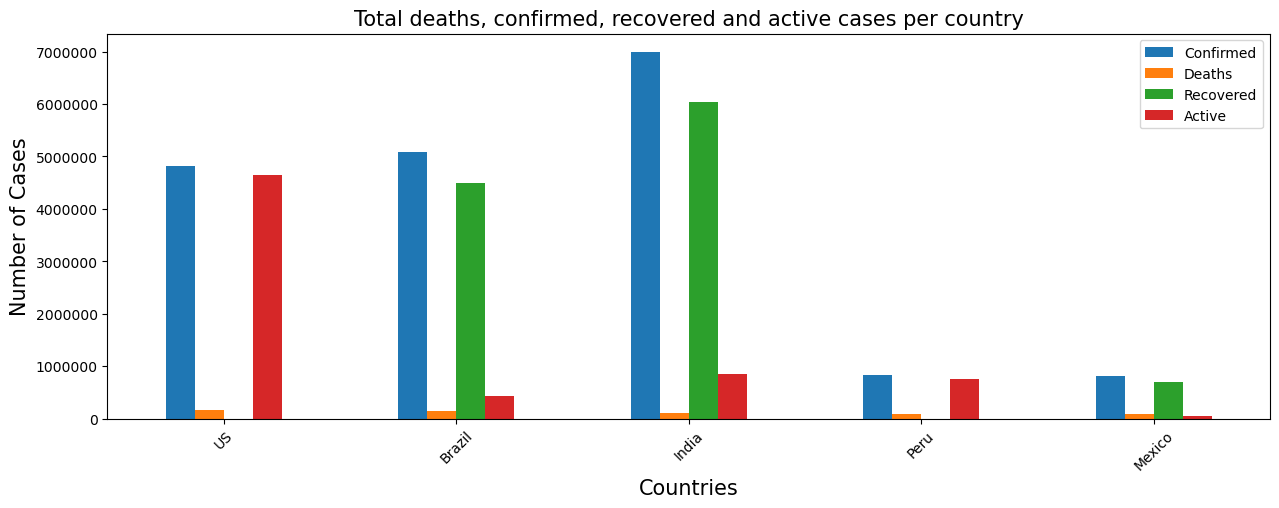

In [12]:
total_cases = covid_data[covid_data['Deaths'] > 150]
total_cases = total_cases.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
total_cases = total_cases.sort_values(['Deaths', 'Confirmed'], ascending=False).head()

ax = total_cases.plot(x = 'Country_Region', kind = 'bar', figsize = (15,5))
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.title('Total deaths, confirmed, recovered and active cases per country', fontsize = 15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Number of Cases', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

Q.11  Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA

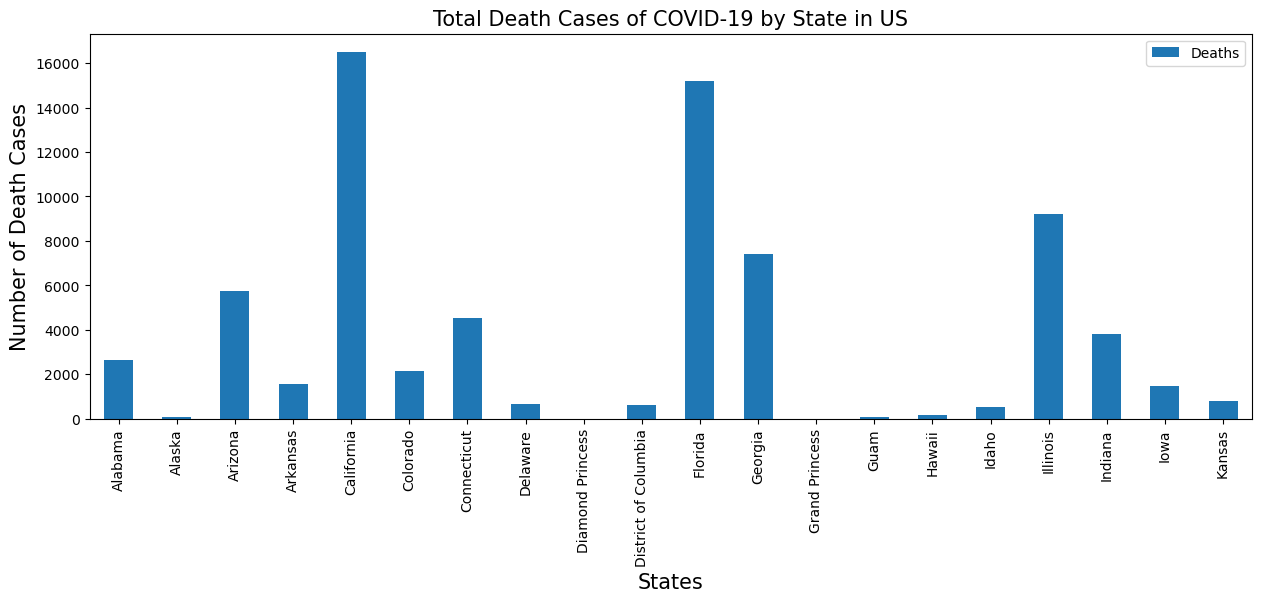

In [13]:
us_cases = covid_data[(covid_data['Country_Region'] == 'US')]
us_cases = us_cases.groupby(['Province_State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

ax2 = us_cases.head(20).plot(x = 'Province_State', y = ['Deaths'], kind = 'bar', figsize = (15,5))
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.title('Total Death Cases of COVID-19 by State in US', fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Number of Death Cases', fontsize = 15)
# plt.xticks(rotation=45)
plt.show()

Q.12 Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA

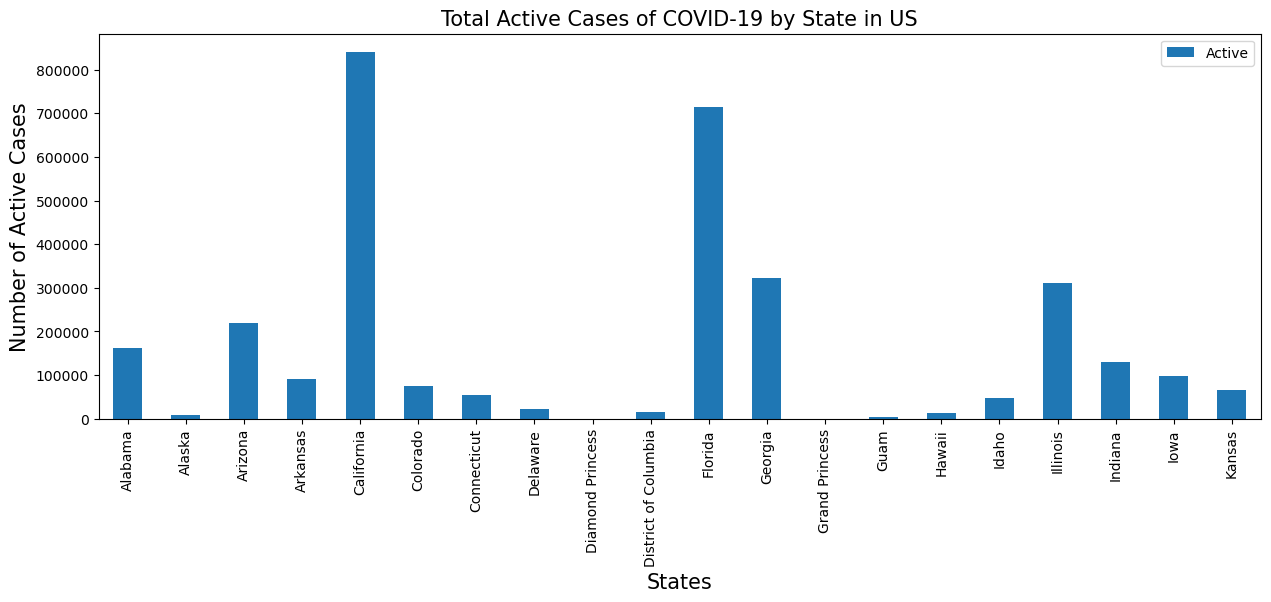

In [14]:
us_cases = covid_data[(covid_data['Country_Region'] == 'US')]
us_cases = us_cases.groupby(['Province_State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

ax3 = us_cases.head(20).plot(x = 'Province_State', y = ['Active'], kind = 'bar', figsize = (15,5))
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.title('Total Active Cases of COVID-19 by State in US', fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Number of Active Cases', fontsize = 15)
# plt.xticks(rotation=45)
plt.show()

Q.13 Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.

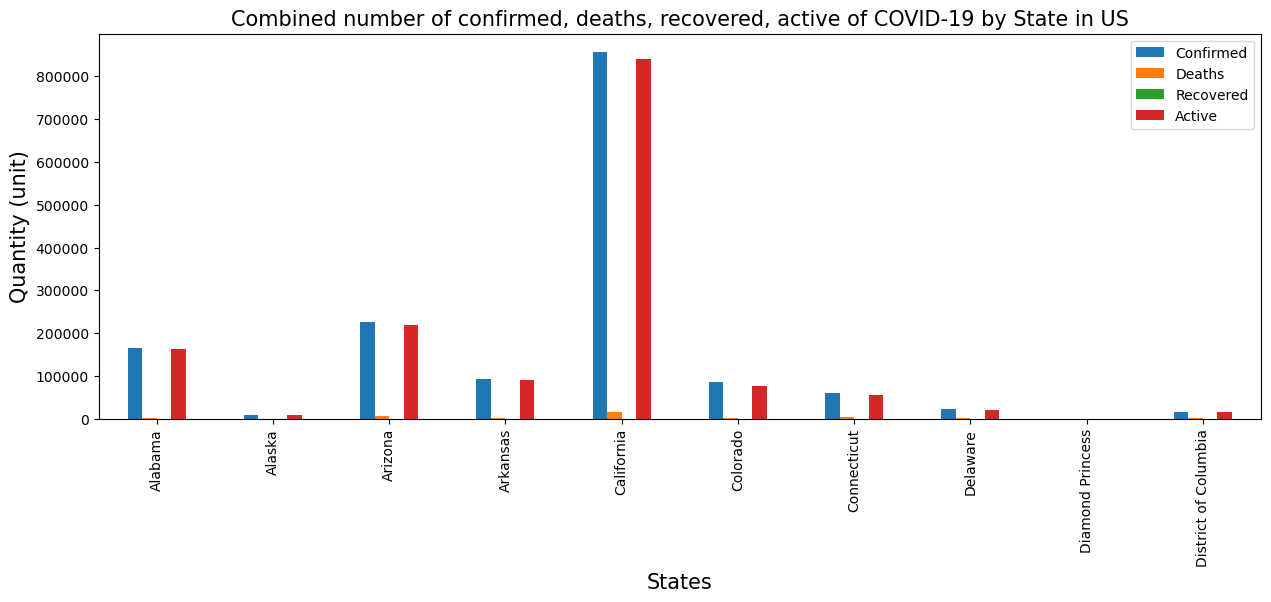

In [15]:
us_cases = covid_data[(covid_data['Country_Region'] == 'US')]
us_cases = us_cases.groupby(['Province_State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

ax4 = us_cases.head(10).plot(x = 'Province_State', kind = 'bar', figsize = (15,5))
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.title('Combined number of confirmed, deaths, recovered, active of COVID-19 by State in US', fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantity (unit)', fontsize = 15)
# plt.xticks(rotation=45)
plt.show()

Q.14 Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time